In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## EDA

The dataset has 1174 rows and 59 columns.
Food Name                                object
Category Name                            object
Calcium                                 float64
Calories                                float64
Carbs                                   float64
Cholesterol                             float64
Copper                                  float64
Fats                                    float64
Fiber                                   float64
Folate                                  float64
Iron                                    float64
Magnesium                               float64
Monounsaturated Fat                     float64
Net carbs                               float64
Omega-3 - DHA                           float64
Omega-3 - DPA                           float64
Omega-3 - EPA                           float64
Phosphorus                              float64
Polyunsaturated fat                     float64
Potassium                               float6

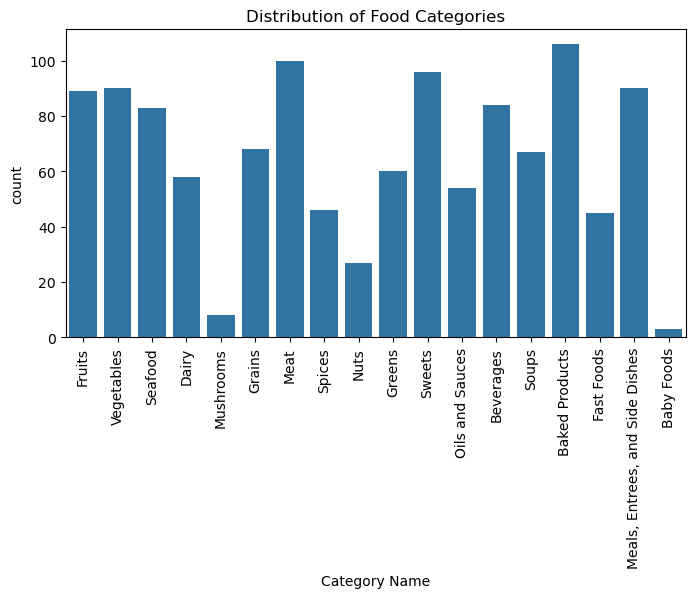

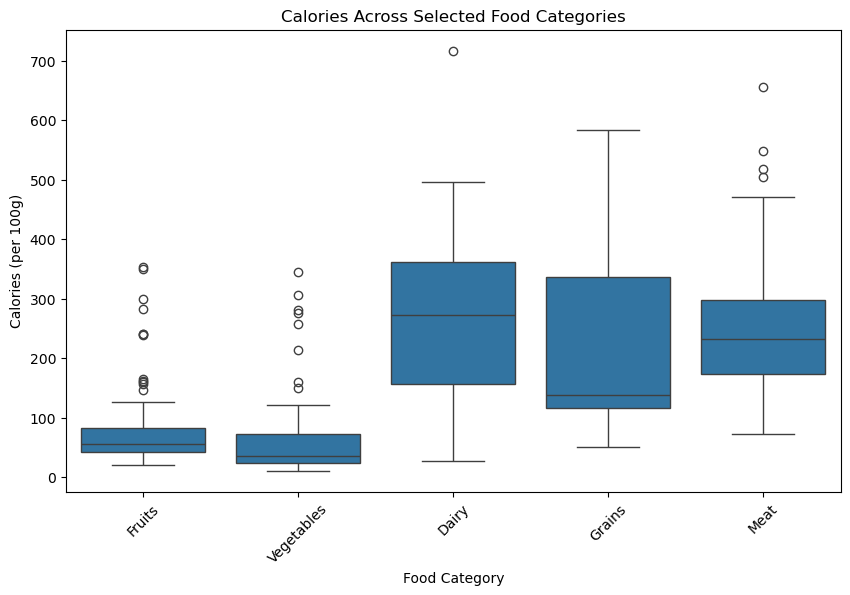

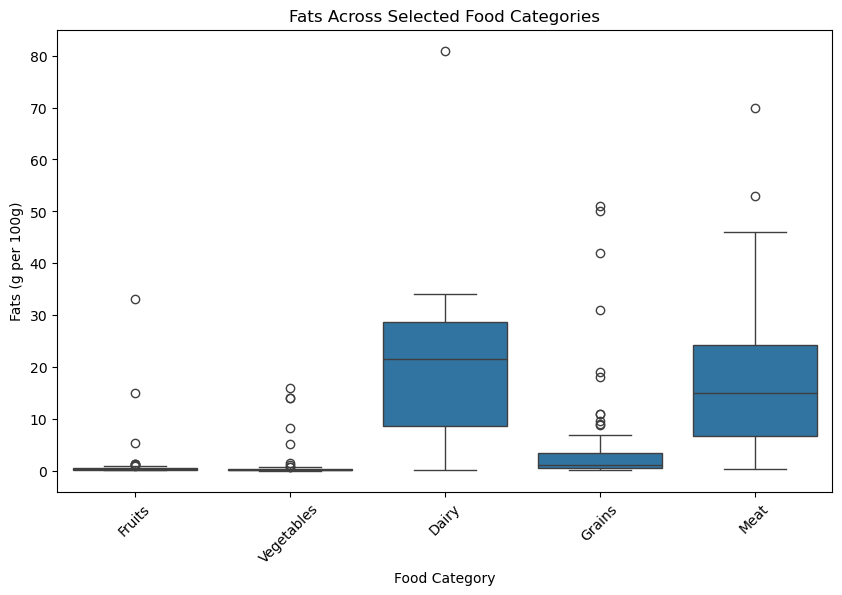

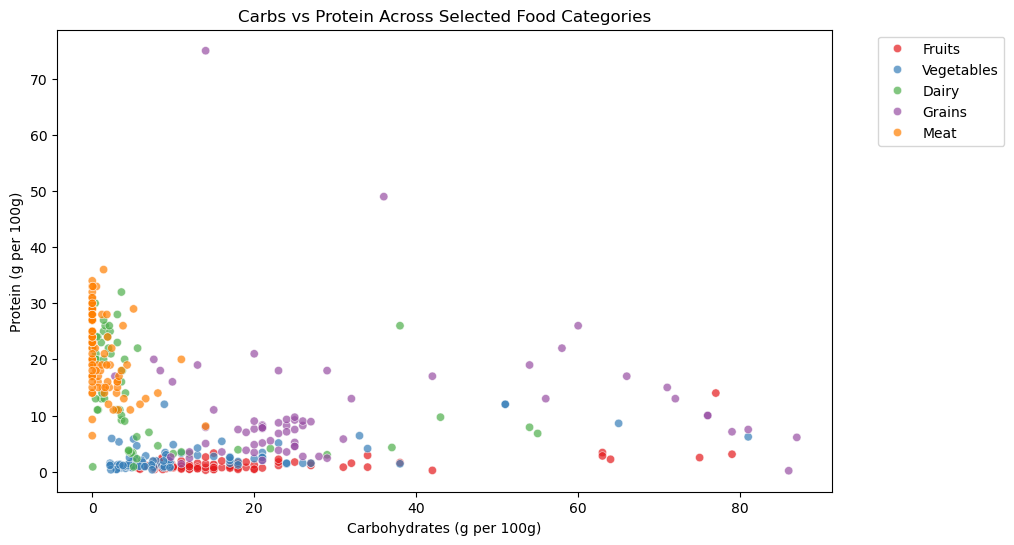

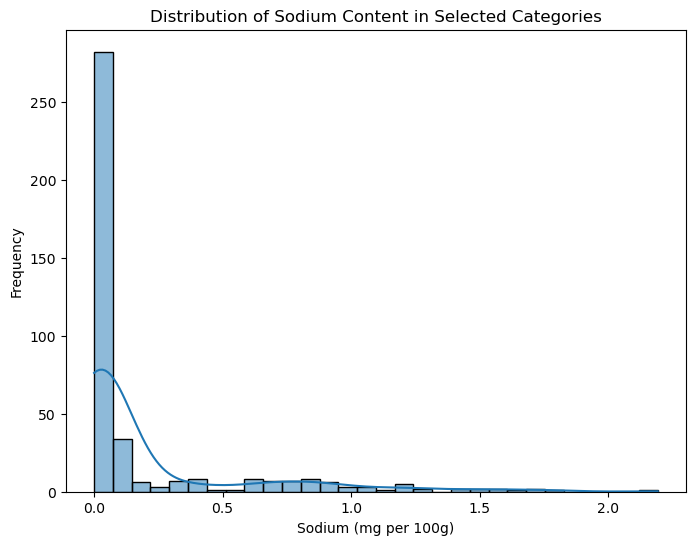

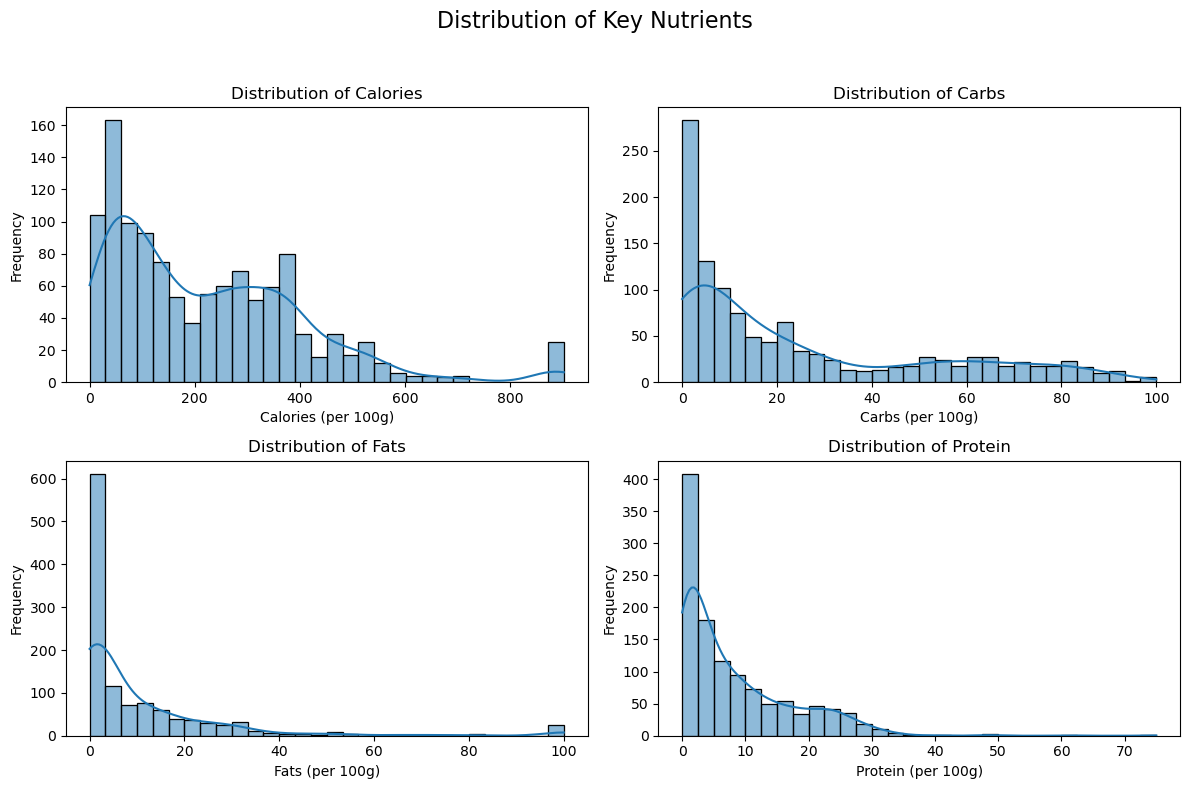


Top 10 categories by average Protein content:
                                    Protein
Category Name                             
Seafood                          21.707229
Meat                             21.548000
Dairy                            14.201724
Nuts                             12.996296
Grains                           10.695000
Fast Foods                       10.574444
Spices                           10.102391
Meals, Entrees, and Side Dishes   8.339778
Baked Products                    7.524528
Baby Foods                        7.400000


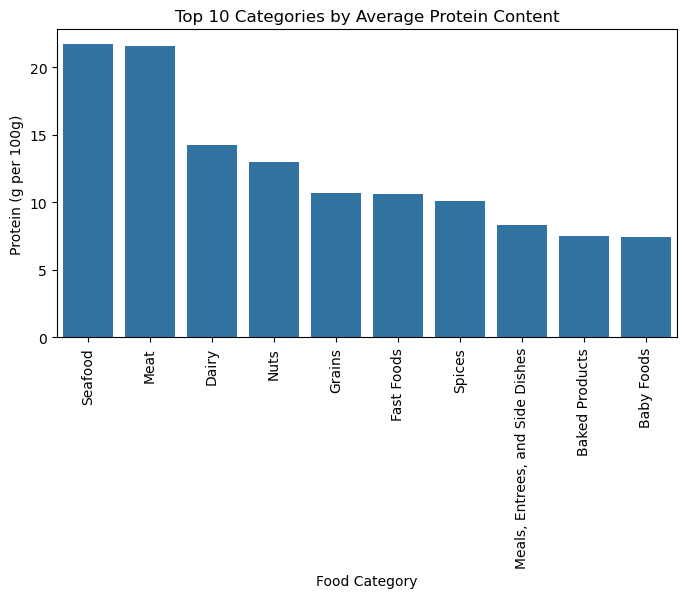

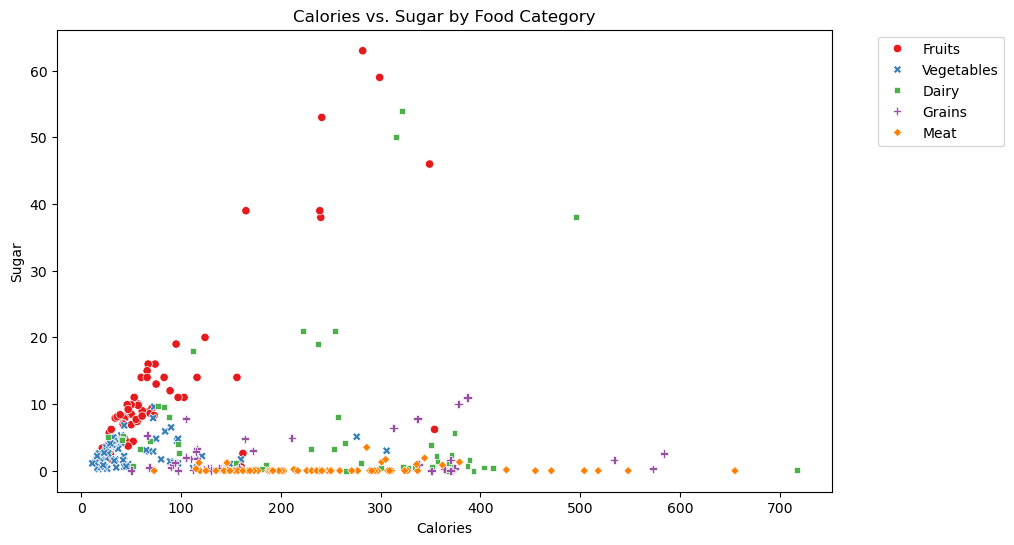

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('midterm/foodstruct_nutritional_facts.csv')

# 1. Data Overview
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")
pd.set_option('display.max_rows', None)
print(data.dtypes)

# 2. Check Missing Values
print("\nMissing values per column:")
print(data.isnull().sum())

# 3. Summary of Target Variable (Food Category)
print(data['Category Name'].value_counts())
print(data['Category Name'].describe())

# Visualize distribution of the target variable (Category Name)
plt.figure(figsize=(8, 4))
sns.countplot(x='Category Name', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Food Categories')
plt.show()

# 4. Filter the dataset to focus on specific food categories
categories_to_focus = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat']
filtered_data = data[data['Category Name'].isin(categories_to_focus)]


# Boxplot: Calories across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Calories', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Calories Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Calories (per 100g)')
plt.show()

# Boxplot: Fats across selected categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Fats', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Fats Across Selected Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Fats (g per 100g)')
plt.show()

# Scatterplot: Carbs vs Protein for selected categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Carbs', y='Protein', hue='Category Name', data=filtered_data, palette='Set1', alpha=0.7)
plt.title('Carbs vs Protein Across Selected Food Categories')
plt.xlabel('Carbohydrates (g per 100g)')
plt.ylabel('Protein (g per 100g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Histogram: Sodium content distribution in selected categories
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Sodium'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sodium Content in Selected Categories')
plt.xlabel('Sodium (mg per 100g)')
plt.ylabel('Frequency')
plt.show()



# Distribution of Key Nutrients
# Plot histograms for key nutrients
key_nutrients = ['Calories', 'Carbs', 'Fats', 'Protein']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
fig.suptitle('Distribution of Key Nutrients', fontsize=16)

axes = axes.flatten()

for i, nutrient in enumerate(key_nutrients):
    sns.histplot(data[nutrient].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {nutrient}')
    axes[i].set_xlabel(f'{nutrient} (per 100g)')
    axes[i].set_ylabel('Frequency')


plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

# Top Categories by Nutrient
top_protein_categories = data[['Category Name', 'Protein']].groupby('Category Name').mean().sort_values(by='Protein', ascending=False).head(10)
print("\nTop 10 categories by average Protein content:\n", top_protein_categories)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_protein_categories.index, y=top_protein_categories['Protein'])
plt.xticks(rotation=90)
plt.title('Top 10 Categories by Average Protein Content')
plt.xlabel('Food Category')
plt.ylabel('Protein (g per 100g)')
plt.show()

# calories vs. sugar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Calories', y='Sugar', hue='Category Name', style='Category Name', palette='Set1')
plt.title('Calories vs. Sugar by Food Category')
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




## Preprocessing

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('midterm/foodstruct_nutritional_facts.csv')

# 1. Split the data
X = data.drop(columns=['Category Name'])  # Features
y = data['Category Name']  # Target 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train set size: {X_train.shape[0]} data points, Test set size: {X_test.shape[0]} data points.")
print(f"Number of features: {X_train.shape[1]} before preprocessing")

# 2. Missing values analysis before preprocessing
missing_values_before = X_train.isnull().sum()
fraction_missing_values = X_train.isnull().mean()


print("\nMissing values in features before preprocessing:")
print(missing_values_before[missing_values_before > 0])


print("\nFraction of missing values per feature:")
print(fraction_missing_values[fraction_missing_values > 0])

# 3. Preprocessing
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns


imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols)
X_test_numeric_imputed = pd.DataFrame(imputer.transform(X_test[numeric_cols]), columns=numeric_cols)


X_train_non_numeric = X_train[non_numeric_cols].copy()
X_test_non_numeric = X_test[non_numeric_cols].copy()

# Scaling the numeric data
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric_imputed), columns=numeric_cols)
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric_imputed), columns=numeric_cols)

# Combine scaled numeric and non-numeric columns back together
X_train_final = pd.concat([X_train_numeric_scaled, X_train_non_numeric.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_numeric_scaled, X_test_non_numeric.reset_index(drop=True)], axis=1)

# 4. After Preprocessing
print("\nNumber of features after preprocessing:", X_train_final.shape[1])

# Check for any remaining missing values after imputation
missing_values_after = X_train_final.isnull().sum()
print("\nMissing values in features after preprocessing (should be zero for numeric features):\n", missing_values_after[missing_values_after > 0])


Train set size: 939 data points, Test set size: 235 data points.
Number of features: 58 before preprocessing

Missing values in features before preprocessing:
Calcium                                  19
Cholesterol                              40
Copper                                   64
Fiber                                    76
Folate                                   79
Iron                                     16
Magnesium                                48
Monounsaturated Fat                      85
Net carbs                                 1
Omega-3 - DHA                           214
Omega-3 - DPA                           219
Omega-3 - EPA                           213
Phosphorus                               37
Polyunsaturated fat                      85
Potassium                                36
Saturated Fat                            62
Selenium                                120
Sodium                                   16
Trans Fat                               436
Vitam